In [1]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import pandas as pd

In [2]:
df = pd.read_csv("oktoberfest.csv")

In [3]:
df.head()

,year,duration,guests_total,guests_daily,beer_price,beer_consumption,roast_chicken_price,roast_chicken_consumption
0,1985,16,7.1,444,3.20,54541,4.77,629520
1,1986,16,6.7,419,3.30,53807,3.92,698137
2,1987,16,6.5,406,3.37,51842,3.98,732859
3,1988,16,5.7,356,3.45,50951,4.19,720139
4,1989,16,6.2,388,3.60,51241,4.22,775674


(0.0, 8.0)

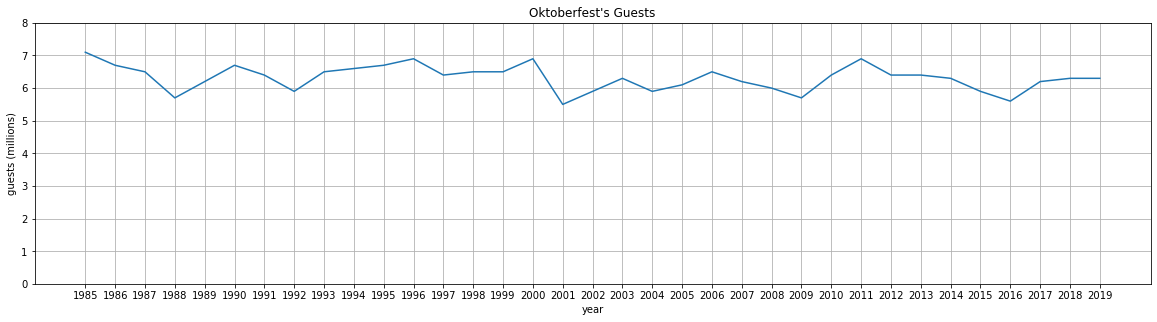

In [4]:
plt.figure(figsize=(20, 4.8))
plt.plot(df["year"], df["guests_total"])
plt.title("Oktoberfest's Guests")
plt.xlabel("year")
plt.ylabel("guests (millions)")
plt.grid(True)
ax = plt.gca()
ax.set_xticks(list(range(1985, 2020)))
ax.set_ylim(0, 8)

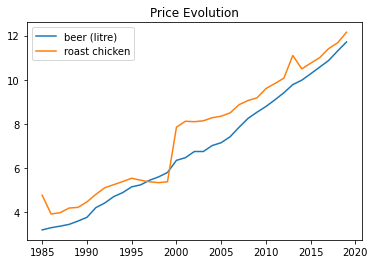

In [5]:
plt.plot(df["year"], df["beer_price"])
plt.plot(df["year"], df["roast_chicken_price"])
plt.title("Price Evolution")
plt.legend(["beer (litre)", "roast chicken"])

In [7]:
df_previous = df[["year","beer_price", "roast_chicken_price"]].shift(1)
df_previous.columns = ["previous_year", "previous_beer_price", "previous_roast_chicken_price"]
df2 = df.join(df_previous)
df2.drop(index=0, inplace=True)
df2["oktoberfest_price_index"] = ((df["beer_price"] + df["roast_chicken_price"]) / (df2["previous_beer_price"] + df2["previous_roast_chicken_price"])) - 1

In [8]:
df_cpi = pd.DataFrame({
       "year": list(range(1992, 2022)),
       "cpi": [0.05, 0.045, 0.026, 0.018, 0.013, 0.02, 0.009, 0.006, 0.014, 0.02, 0.013, 0.011, 0.017, 0.015, 0.016, 0.023, 0.026, 0.003, 0.011, 0.021, 0.02, 0.014, 0.01, 0.005, 0.005, 0.015, 0.018, 0.014, 0.005, 0.031]
})

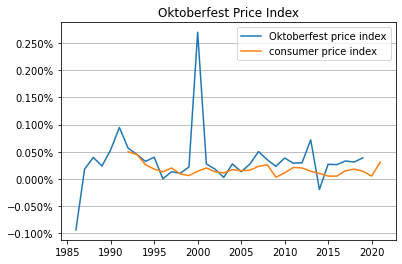

In [9]:
plt.plot(df2["year"], df2["oktoberfest_price_index"])
plt.plot(df_cpi["year"], df_cpi["cpi"])
plt.legend(["Oktoberfest price index", "consumer price index"])
plt.title("Oktoberfest Price Index")
plt.grid(True, axis="y")
ax = plt.gca()
ax.yaxis.set_major_formatter(mtick.PercentFormatter())